In [1]:
#Import Modules
import os
import deconvolution_tools as dt
import numpy as np

%matplotlib inline


In [2]:
drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

ophys_experiment_id = 501474098 #example experiment


In [3]:
#Use dt.get_dff to get all dff traces and timestamps
dff_traces, timestamps, cell_specimen_ids = dt.get_dff(boc=boc, ophys_experiment_id=ophys_experiment_id)

#Check that the shape makes sense
print dff_traces.shape
print timestamps.shape

(108, 105743)
(105743,)


In [4]:
#Use get_spiking_data to use the Oasis deconvolution algorithm

spiking_data = dt.get_spiking_data(dff_traces=dff_traces, timestamps=timestamps, cell_specimen_ids=cell_specimen_ids,sig=3)


/Users/perryspratt/anaconda/lib/python2.7/site-packages/OASIS/functions.py:15: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


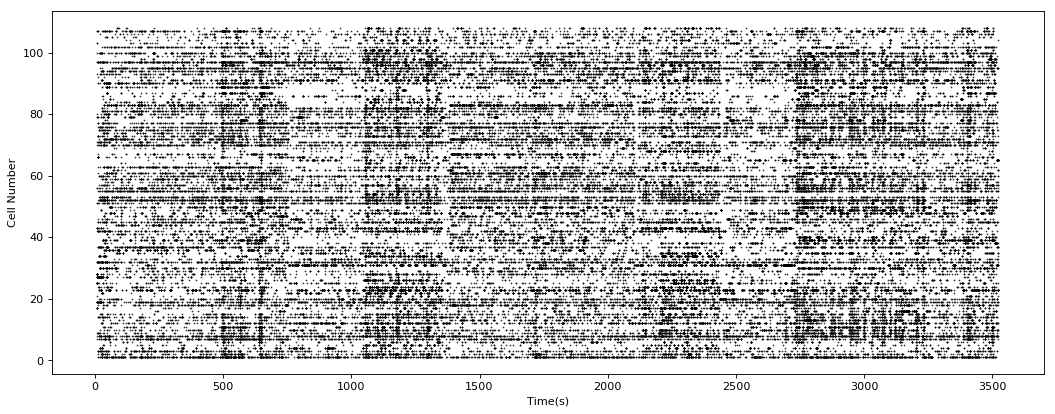

In [5]:
#Plot the spike times in a raster plot

spike_times = [spiking_data['spike_times'][cells] for cells in spiking_data['spike_times']]

dt.plot_raster(spike_times=spike_times)